## Glass Identification Project

Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass 
using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler 
in 1987. The study of classification of types of glass was motivated by criminological investigation. 
At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) 
and non-window glass (classes 5-7). 

Predict : Type of glass

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
https://github.com/dsrscientist/dataset3

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

In [29]:
Glass_df = pd.read_csv("glass.csv")
Glass_df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Observation:
            1. Label (i.e. "Type of Glass") contains classification data so this is a Classification 
               Problem.
            2. Window glass (classes 1-4) and Non-Window glass (classes 5-7)
            3. Multi-Classification Problem
            4. Input Variables are Numeric and Class label "Type of Glass" is integer
            5. Reduce Multi-classification in to binary classification 

## Exploratory Data Analysis

In [30]:
Glass_df.shape  # 11 columns

(214, 11)

In [31]:
Glass_df.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of Glass'],
      dtype='object')

In [32]:
Glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


## Drop Column not needed

In [33]:
# 'ID' column not needed for prediction of "Type of Glass'

Glass_df.drop(["ID"], axis = 1, inplace = True)
Glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [34]:
Glass_df.shape  # 10 columns

(214, 10)

In [35]:
Glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of Glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [36]:
Glass_df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of Glass    0
dtype: int64

Observation:
            1. No Null values

## check for any blank records

In [37]:
Glass_df.loc[Glass_df['Type of Glass'] == ' '] 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass


## check the duplicate values in rows

In [38]:
Glass_df.dtypes

RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of Glass      int64
dtype: object

In [39]:
Glass_df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass']

In [40]:
Glass_df.shape

(214, 10)

In [41]:
Glass_df.duplicated().sum()

1

Observation:
            1. Only 1 duplicate value in rows, so we can ignore it.

In [42]:
Glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Number of uniques values in each column 

In [43]:
Glass_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32
Type of Glass,6


In [44]:
Glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Observations:
            1. No missing values
            2. Mean value is > median value so might be right skew and postively correlated
            3. Looks like there are outliers

In [45]:
Glass_df.shape

(214, 10)

## Data Visualization

In [46]:
Glass_df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of Glass'], dtype='object')

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


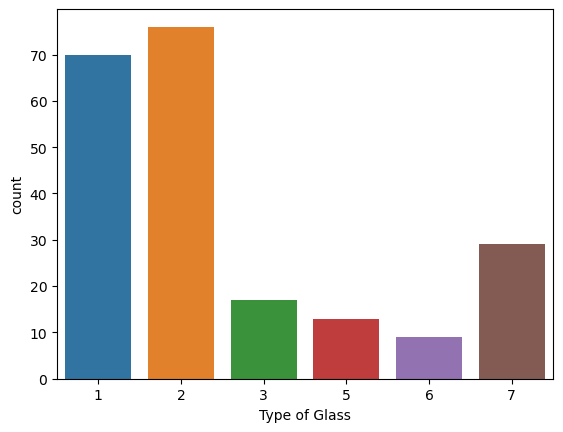

In [47]:
# Univariate Analysis

sns.countplot(x = 'Type of Glass', data = Glass_df)
print(Glass_df['Type of Glass'].value_counts())

Observations:
            1. 'Type of Glass' - 4 is not present
            2. More number of 'Type of Glass' 1 and 2 are present 

In [48]:
Glass_df.nunique()

RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of Glass      6
dtype: int64

In [49]:
Glass_df['Type of Glass'].nunique()

6

In [50]:
Glass_df['Type of Glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [51]:
print(Glass_df['Type of Glass'].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64


## Feature Encoding

## Convert 'Type of Glass' 1, 2 and 3 as class 0 and 'Type of Glass' 5, 6 and 7 as class 1

In [52]:
Glass_df['Type of Glass'].replace([1,2,3,5,6,7],[0,0,0,1,1,1],inplace=True)

In [53]:
Glass_df['Type of Glass'].nunique()

2

In [54]:
Glass_df['Type of Glass'].unique()

array([0, 1], dtype=int64)

0    163
1     51
Name: Type of Glass, dtype: int64


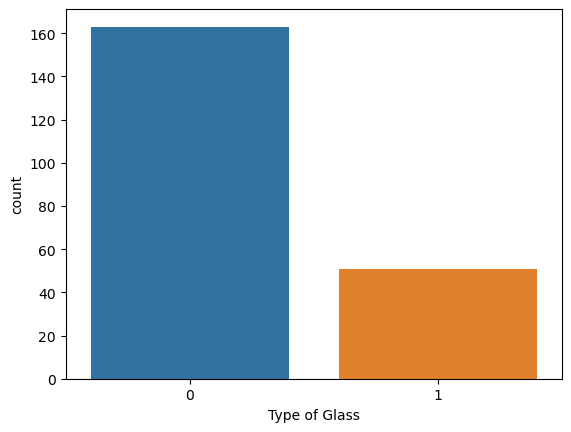

In [55]:
# Univariate Analysis

sns.countplot(x = 'Type of Glass', data = Glass_df)
print(Glass_df['Type of Glass'].value_counts())

Observations:
            1. 76% dataset belongs to class 0 (i.e. window glass) and 24% dataset belongs to class 1
                (i.e. non-window glass)
            2. More number of 'Type of Glass' belongs to class 0
            3. Hence this is imbalanced dataset and we need to fix this issue.

<AxesSubplot:>

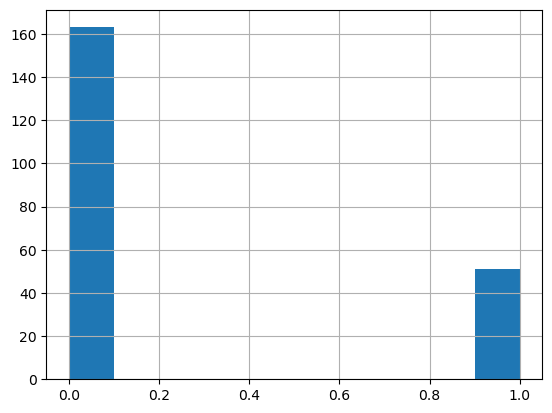

In [56]:
Glass_df['Type of Glass'].hist()

<AxesSubplot:>

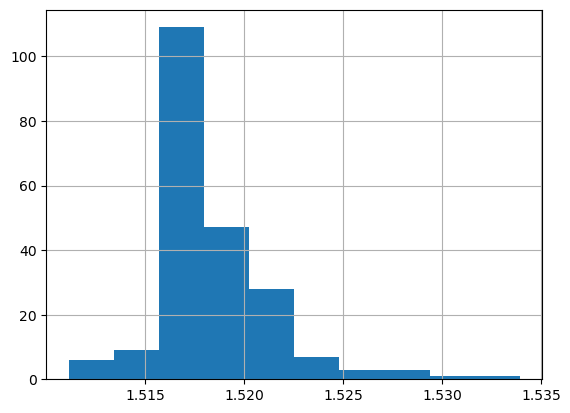

In [222]:
Glass_df['RI'].hist()

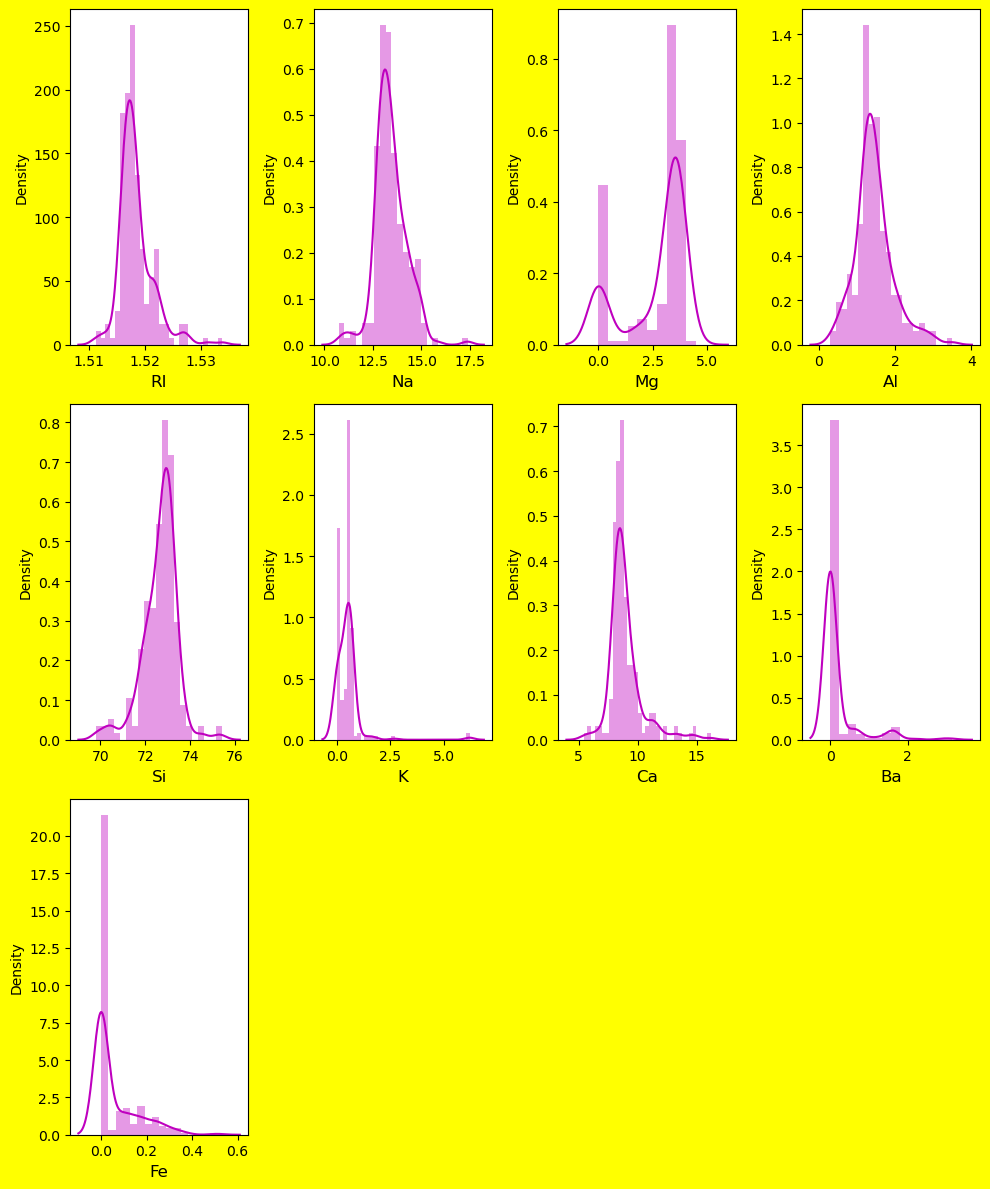

In [57]:
# lets see how numeric data is distributed for every column

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in Glass_df.drop(['Type of Glass'], axis = 1):
    if p <= 12:
        ax = plt.subplot(3, 4, p)
        sns.distplot(Glass_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
        1. There are lot of outliers - Looks like we should also deal with outliers
        2. We need to deal with skewness in the data - most of the variables right skewness are there 

In [58]:
Glass_df.shape

(214, 10)

## Check for Multicollinearity

## Data Correlation find - whether we need all 09 columns

In [59]:
# get coefficient of one variable with all the other variables

cor = Glass_df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903
Type of Glass,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,0.523403,-0.194903,1.000000


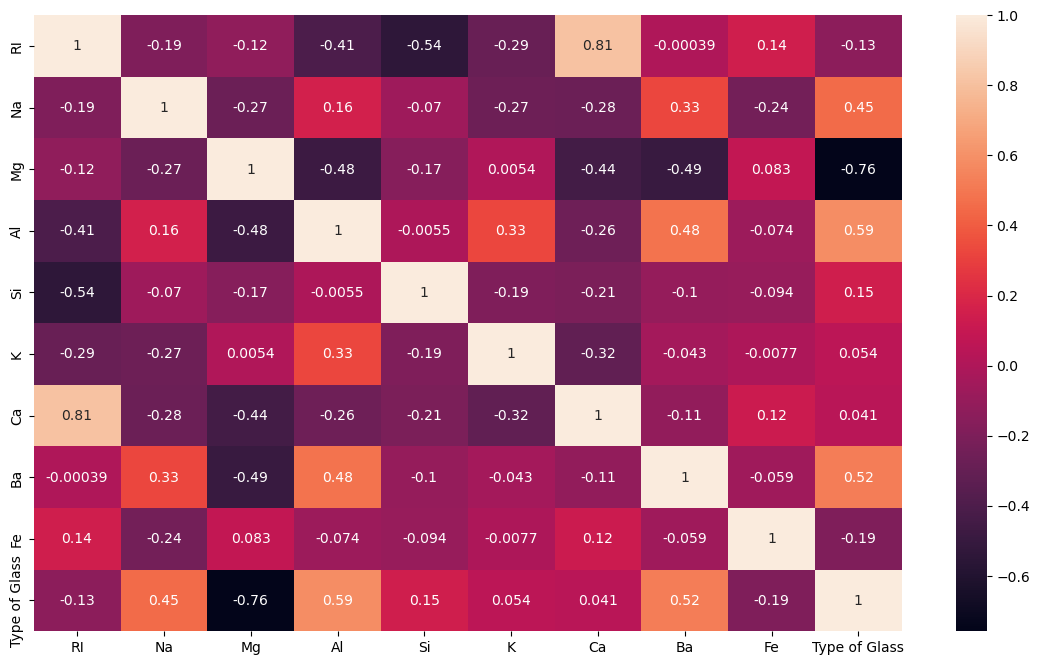

In [60]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'RI' v/s 'Ca' has more Postive correlation 0.81
               This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

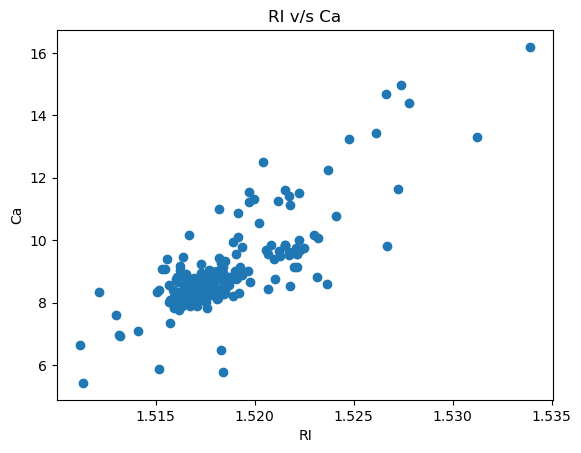

In [61]:
# one more proof so will plot scatter plot and check

plt.scatter(Glass_df['RI'], Glass_df.Ca)
plt.xlabel("RI")
plt.ylabel("Ca")
plt.title("RI v/s Ca")
plt.show()

Observation:
            1. feature v/s feature - 'RI' v/s 'Ca' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'RI' increases 'Ca' value also increases - Postive correlation

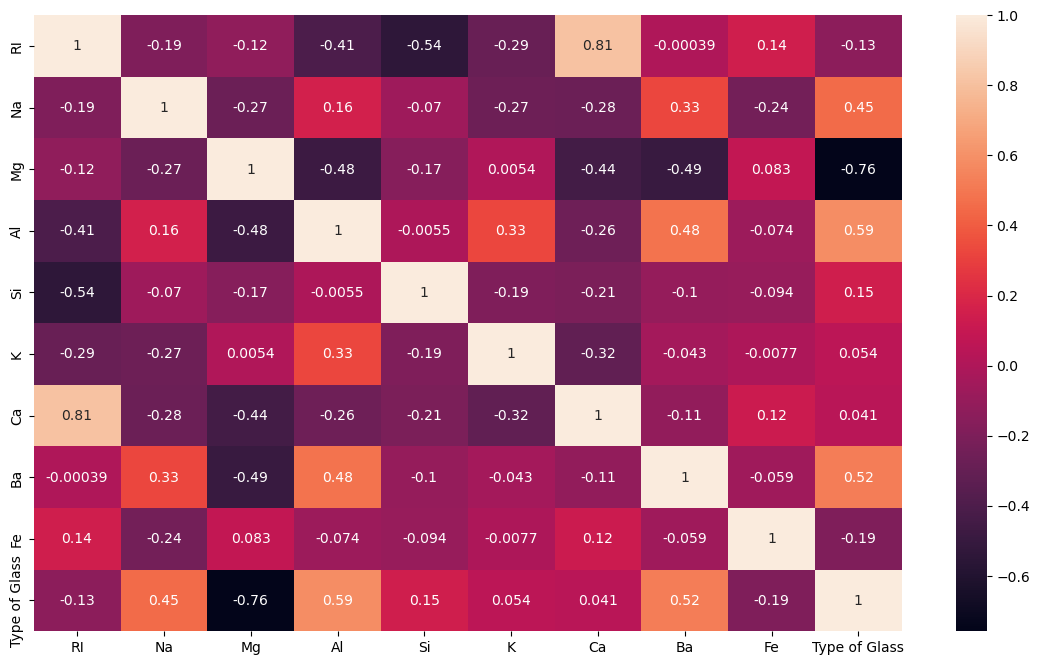

In [62]:
# Now check through heat map 'fixed acidity' or 'pH' is contributing more correlation
#  to the label keep that and drop the other one

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'RI' v/s 'Type of Glass' is -0.13 and 
               'Ca' v/s 'Type of Glass' is 0.041 from this heatmap we get to know 'Ca'. 
                but, this number is very small. so ignore it.

In [63]:
# correlation of all features with the target column - 'Survived'

cor['Type of Glass'].sort_values(ascending = False)  

Type of Glass    1.000000
Al               0.585928
Ba               0.523403
Na               0.452336
Si               0.148072
K                0.053774
Ca               0.040670
RI              -0.134327
Fe              -0.194903
Mg              -0.758289
Name: Type of Glass, dtype: float64

## Checking Outliers

In [64]:
# we dont check outliers for labels - so remove the label

Glass_df_features = Glass_df.drop(['Type of Glass'], axis = 1)

In [65]:
Glass_df_features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


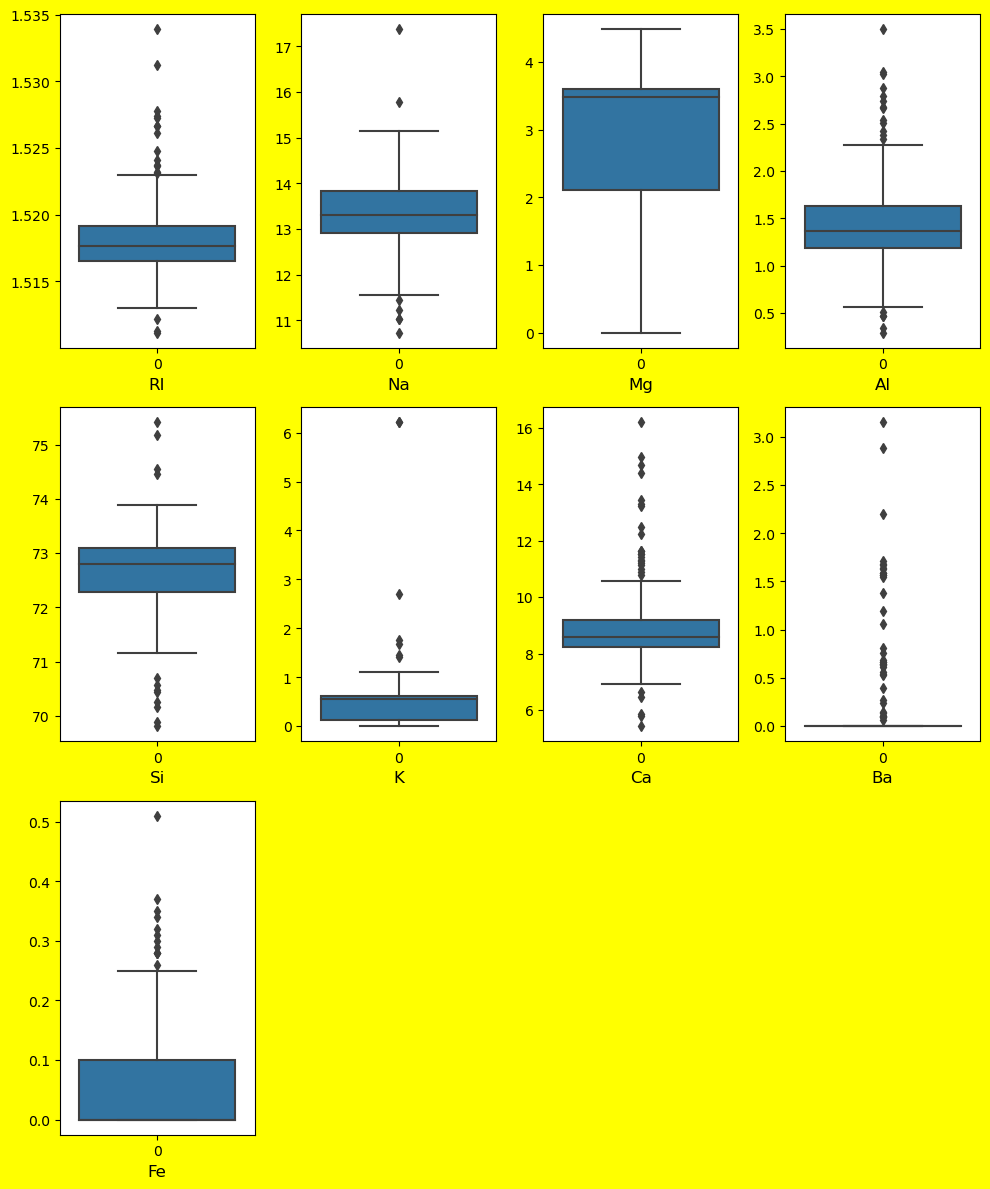

In [66]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,12), facecolor = 'yellow')
p = 1
for i in Glass_df_features:
    if p <= 11:
        ax = plt.subplot(3, 4, p)
        sns.boxplot(data = Glass_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. More Outliers found in features - 'RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'. 
                Most of this outliers are right skewed (i.e. outliers are above max value) and some 
                are also left skewed (i.e. outliers are below min value)
            2. Remove the outliers

In [67]:
Glass_df_features.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

## Find IQR to identify outliers and remove it

In [68]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = Glass_df.quantile(0.25)
q3 = Glass_df.quantile(0.75)
iqr = q3 - q1

In [69]:
# validating one outlier

RI_high = (q3['RI'] + (1.5 * iqr['RI']))
RI_high

# anything > 1.52311 outliers

1.52311

In [70]:
# check the index which have the higher values

np_index = np.where(Glass_df['RI'] > RI_high)
np_index

# remove these indexes as they are outliers

(array([ 47,  50, 103, 104, 105, 106, 107, 110, 111, 112, 131, 170, 187,
        189], dtype=int64),)

In [71]:
Glass_df.shape

(214, 10)

In [72]:
Glass_df = Glass_df.drop(Glass_df.index[np_index])

In [73]:
Glass_df.shape  # 14 rows removed - outliers

(200, 10)

In [74]:
Glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [75]:
Glass_df.reset_index(inplace = True, drop = True)

In [76]:
Glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
195,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
196,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
197,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
198,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


Observation:
            1. As we have less samples removing more samples is not good. So we are not going 
                to remove the outliers

## Checking for Skewness

In [77]:
Glass_df.skew() # not in the range -0.5 to +0.5

RI               0.195715
Na               0.956629
Mg              -1.317103
Al               0.976086
Si              -0.411450
K                6.471170
Ca               0.677120
Ba               3.261315
Fe               1.827418
Type of Glass    1.226782
dtype: float64

In [78]:
# removing for skewness

Glass_df['Al'] = np.cbrt(Glass_df['Al'])

Glass_df['K'] = np.cbrt(Glass_df['K'])

Glass_df['Na'] = np.cbrt(Glass_df['Na'])

Glass_df['Ba'] = np.cbrt(Glass_df['Ba'])

Glass_df['Fe'] = np.cbrt(Glass_df['Fe'])

In [79]:
Glass_df.skew() # not in the range -0.5 to +0.5

RI               0.195715
Na               0.728748
Mg              -1.317103
Al              -0.193801
Si              -0.411450
K               -0.642140
Ca               0.677120
Ba               2.038724
Fe               0.932283
Type of Glass    1.226782
dtype: float64

Observation: 
            1. There are still skewness in the data

## Seperating Features and Target

In [80]:
Glass_df.shape

(200, 10)

In [81]:
x = Glass_df.drop(columns = ['Type of Glass'])
y = Glass_df['Type of Glass']

In [82]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,2.389304,4.49,1.032280,71.78,0.391487,8.75,0.000000,0.0
1,1.51761,2.403813,3.60,1.107932,72.73,0.782974,7.83,0.000000,0.0
2,1.51618,2.382864,3.55,1.154800,72.99,0.730614,7.78,0.000000,0.0
3,1.51766,2.363928,3.69,1.088587,72.61,0.829134,8.22,0.000000,0.0
4,1.51742,2.367502,3.62,1.074337,73.08,0.819321,8.07,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
195,1.51623,2.418149,0.00,1.422757,72.61,0.430887,9.18,1.019613,0.0
196,1.51685,2.461820,0.00,1.257818,73.06,0.000000,8.40,1.167165,0.0
197,1.52065,2.430626,0.00,1.264107,73.42,0.000000,8.44,1.179274,0.0
198,1.51651,2.431754,0.00,1.247194,73.61,0.000000,8.48,1.162251,0.0


In [83]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Type of Glass, Length: 200, dtype: int64

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [84]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x)
x_scaled

array([[ 1.5375938 ,  0.28665563,  1.24081337, ...,  0.02782763,
        -0.44381193, -0.66827241],
       [-0.09258454,  0.62000374,  0.59529304, ..., -0.91862043,
        -0.44381193, -0.66827241],
       [-0.77821837,  0.13869152,  0.55902785, ..., -0.97005783,
        -0.44381193, -0.66827241],
       ...,
       [ 1.36498668,  1.23602635, -2.01580041, ..., -0.29108422,
         2.81480464, -0.66827241],
       [-0.61999518,  1.26193995, -2.01580041, ..., -0.2499343 ,
         2.76776648, -0.66827241],
       [-0.33231665,  1.06699871, -2.01580041, ..., -0.1059096 ,
         2.83455431, -0.66827241]])

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,4.612522,RI
1,6.172280,Na
2,7.935134,Mg
3,3.202282,Al
4,3.497909,Si
5,4.973265,K
6,7.921014,Ca
7,3.507969,Ba
8,1.076655,Fe


Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we can observe some features are > threshold value=5. 
               so there might be still multicollinearity problem.

## Modelling

In [86]:
Glass_df.shape

(200, 10)

In [87]:
x.shape

(200, 9)

In [88]:
y.shape

(200,)

## Data Imbalance use Oversampling method

In [89]:
y.value_counts()

0    152
1     48
Name: Type of Glass, dtype: int64

Observation:
            1. Window Glass represents '0' and Non-Window Glass represents '1'
            2. Dat is imbalanced so use Oversampling method

In [90]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3, sampling_strategy = 0.75)
x1, y1 = over_samp.fit_resample(x, y)

In [91]:
y1.value_counts()

0    152
1    114
Name: Type of Glass, dtype: int64

Observation:
            1. Window Glass represents '0' and Non-Window Glass represents '1'
            2. Now the data is balanced

In [92]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.25, random_state = 41)

In [93]:
# Function to check accuracy of different models

def metric_score(clf, x_train, x_test, y_train, y_test, train = True):
    if train == True:
        y_pred = clf.predict(x_train)
        print("Train Result ")
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100 : .2f}%')
    elif train == False:
        pred = clf.predict(x_test)
        print("Test Result ")
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100 : .2f}%')
        print("Test Classification Report \n", classification_report(y_test, pred, digits = 2))

## Decision Tree Classifier

In [94]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
# This is the training score

metric_score(dt, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [96]:
# This is the testing score

metric_score(dt, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  97.01%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.96      0.96      0.96        28

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



In [97]:
# to check the confusion matrix

y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[38,  1],
       [ 1, 27]], dtype=int64)

## Random Tree Classifier

In [98]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [99]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [100]:
# This is the training score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  100.00%


In [101]:
# This is the testing score

metric_score(random_clf, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  97.01%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.96      0.96      0.96        28

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



## Logistic Regression Classifier

In [102]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [103]:
# This is the training score

metric_score(logistic_clf, x_train, x_test, y_train, y_test, train = True)

Train Result 
Accuracy Score:  95.98%


In [104]:
# This is the testing score

metric_score(logistic_clf, x_train, x_test, y_train, y_test, train = False)

Test Result 
Accuracy Score:  97.01%
Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.96      0.96      0.96        28

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



## Save the Model

In [105]:
# use Random Forest Classifier  and the save the model

import pickle
pickle.dump(random_clf, open('Glass_Identification_Model.pkl', 'wb'))

## prediction using the saved model

In [106]:
loaded_model = pickle.load(open('Glass_Identification_Model.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0], dtype=int64)

In [107]:
print(y_test)

104    0
116    0
110    0
262    1
251    1
      ..
200    1
57     0
263    1
38     0
91     0
Name: Type of Glass, Length: 67, dtype: int64


In [108]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
62,1,1
63,0,0
64,1,1
65,0,0


Observation:
            1. Almost all actual and predicted values match
            2. This Glass_Identification_Model.pkl can be used to classify whether the given glass is 
               window glass or non-window glass. 
            3. Window Glass represents '0' and Non-Window Glass represents '1'